### 5.1 임계값 영상

ret= 100.0
ret2= 98.0
ret= 100.0
ret= 100.0
ret= 100.0
ret= 100.0


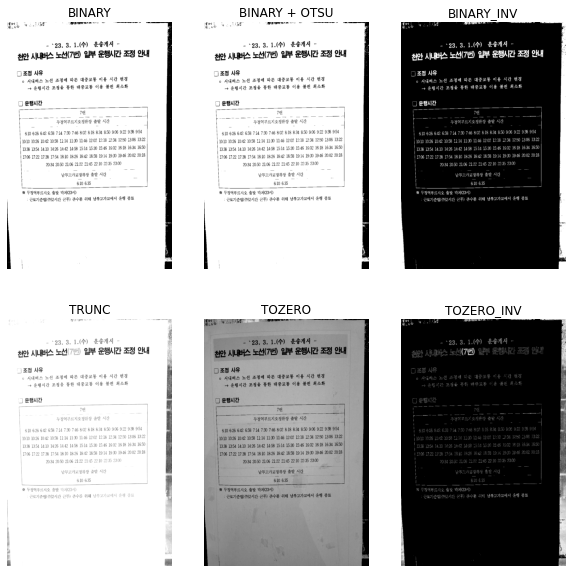

In [26]:
import cv2
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/text1.jpg', cv2.IMREAD_GRAYSCALE)
# src = cv2.imread('C:/data/Heart10.jpg', cv2.IMREAD_GRAYSCALE)/
# cv2.imshow('src', src)

fig, ax = plt.subplots(2, 3, figsize = (10, 10))
fig.canvas.manager.set_window_title('plt')

# threshold 파라미터 
# src – input image로 single-channel 이미지.(grayscale 이미지)
# thresh – 임계값
# maxval – 임계값을 넘었을 때 적용할 value
# type – thresholding type
thresh = 100
maxval = 255
type = cv2.THRESH_BINARY

# 픽셀값이 thresh 보다 크면 maxval 적용, 아니면 0
ret, dst = cv2.threshold(src, thresh, maxval, type)
print('ret=', ret)
ax[0][0].axis('off')
ax[0][0].set_title('BINARY')
ax[0][0].imshow(dst, aspect='auto', cmap='gray')
# cv2.imshow('THRESH_BINARY', dst)

# 
ret2, dst2 = cv2.threshold(src, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('ret2=', ret2)
ax[0][1].axis('off')
ax[0][1].set_title('BINARY + OTSU')
ax[0][1].imshow(dst2, aspect='auto', cmap='gray')
# cv2.imshow('THRESH_BINARY THRESH_OTSU', dst2)

# BINARY의 반대
ret3, dst3 = cv2.threshold(src, thresh, maxval, cv2.THRESH_BINARY_INV)
print('ret=', ret3)
ax[0][2].axis('off')
ax[0][2].set_title('BINARY_INV')
ax[0][2].imshow(dst3, aspect='auto', cmap='gray')
# cv2.imshow('THRESH_BINARY_INV', dst3)

# 픽셀값이 thresh 보다 크면 thresh 적용, 아니면 픽셀 값 그대로
ret4, dst4 = cv2.threshold(src, thresh, maxval, cv2.THRESH_TRUNC)
print('ret=', ret4)
ax[1][0].axis('off')
ax[1][0].set_title('TRUNC')
ax[1][0].imshow(dst4, aspect='auto', cmap='gray')
# cv2.imshow('THRESH_TRUNC', dst4)

# 픽셀값이 thresh 보다 크면 픽셀값 적용, 아니면 0
ret5, dst5 = cv2.threshold(src, thresh, maxval, cv2.THRESH_TOZERO)
print('ret=', ret5)
ax[1][1].axis('off')
ax[1][1].set_title('TOZERO')
ax[1][1].imshow(dst5, aspect='auto', cmap='gray')
# cv2.imshow('THRESH_TOZER', dst5)

# TOZERO의 반대
ret6, dst6 = cv2.threshold(src, thresh, maxval, cv2.THRESH_TOZERO_INV)
print('ret=', ret6)
ax[1][2].axis('off')
ax[1][2].set_title('TOZERO_INV')
ax[1][2].imshow(dst6, aspect='auto', cmap='gray')
# cv2.imshow('THRESH_TOZER', dst5)

plt.show()

# cv2.waitKey()
# cv2.destroyAllWindows()

### 5.2 적응형 임계값 영상

* adaptiveThreshold 파라미터
* src – grayscale image
* maxValue – 임계값
* adaptiveMethod – thresholding value를 결정하는 계산 방법
* thresholdType – threshold type
* blockSize – thresholding을 적용할 영역 사이즈
* C – 평균이나 가중평균에서 차감할 값
<br><br>
* 주변 영역의 크기인 blockSize와 상수 C에 따라 설정되는 임곗값의 결과가 크게 달라집니다.
* blockSize는 중심점이 존재할 수 있게 홀수만 가능하며 상수 C는 일반적으로 양수의 값을 사용하지만 경우에 따라 0이나 음수도 사용 가능합니다.
* Tip : blockSize가 클수록 연산 시간이 오래걸리게 됩니다.


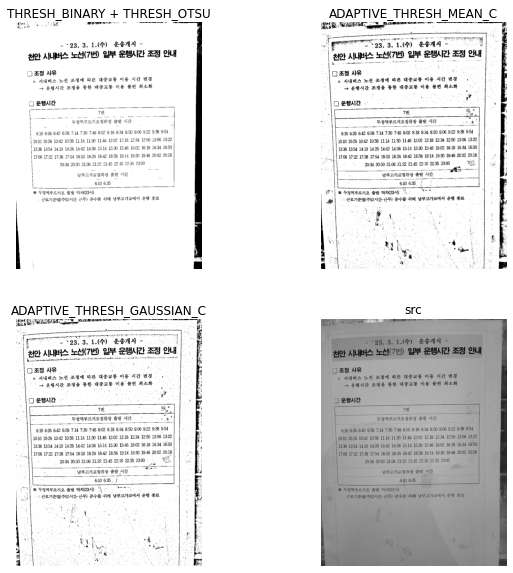

In [54]:
import cv2
from matplotlib import pyplot as plt
src = cv2.imread('c:/data/text1.jpg', cv2.IMREAD_GRAYSCALE)
# src = cv2.imread('c:/data/srcThreshold.png', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharey=True)
fig.canvas.manager.set_window_title('plt')

# cv2.THRESH_OTSU로 인해 임계값을 바꿔도 많이 차이가 나지 않음
ret, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ax[0][0].axis('off')
ax[0][0].set_title('THRESH_BINARY + THRESH_OTSU')
ax[0][0].imshow(dst, cmap='gray')

# cv2.adaptiveThreshold(입력 이미지, 최댓값, 적응형 이진화 플래그, 임곗값 형식, 블록 크기, 감산값)
# cv2.ADAPTIVE_THRESH_MEAN_C, blockSize 영역의 모든 픽셀에 평균 가중치를 적용
dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 7)
ax[0][1].axis('off')
ax[0][1].set_title('ADAPTIVE_THRESH_MEAN_C')
ax[0][1].imshow(dst2, cmap='gray')

# cv2.ADAPTIVE_THRESH_GAUSSIAN_C, blockSize 영역의 모든 픽셀에 중심점으로부터의 거리에 대한 가우시안 가중치 적용
dst3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 7)
ax[1][0].axis('off')
ax[1][0].set_title('ADAPTIVE_THRESH_GAUSSIAN_C')
ax[1][0].imshow(dst3, cmap='gray')

ax[1][1].axis('off')
ax[1][1].set_title('src')
ax[1][1].imshow(src, cmap='gray')

plt.show()

src = cv2.resize(src, (600, 800))
dst2 = cv2.resize(dst2, (600, 800))
cv2.imshow('dst1', src)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

### 5.3 히스토그램 계산

#### cv2.calcHist()의 파라미터

* images : 히스토그램을 계산할 영상의 배열입니다. 영상은 같은 사이트, 깊이의 8bit unsigned 정수 또는 32bit 실수형 입니다.
* channels : 히스토그램을 계산할 channel의 배열. (배열 형태로 입력 필요함), RGB면 channels이 3개입니다.
* mask : images[i]와 같은 크기의 8bit 이미지로, mask(x, y)가 0이 아닌 경우에만 image[i] (x,y)을 히스토그램 계산에 사용합니다.
* mask = None이면 마스크를 사용하지 않고, 모든 화소에서 히스토그램을 계산합니다.
* histSize : 히스토그램 hist (return 값)의 각 빈(bin) 크기에 대한 정수 배열 입니다.
* ranges : 히스토그램 각 빈의 경계값에 대한 배열입니다. opencv는 기본적으로 등간격 히스토그램을 제공합니다.
* accumulate : True 이면 calcHist() 함수를 수행할 때, 히스토그램을 초기화 하지 않고, 이전 값을 계속 누적합니다.
* hist : 히스토그램 리턴값

hist1= [[9.]
 [3.]
 [2.]
 [2.]]
hist2= [[4.]
 [5.]
 [0.]
 [3.]]


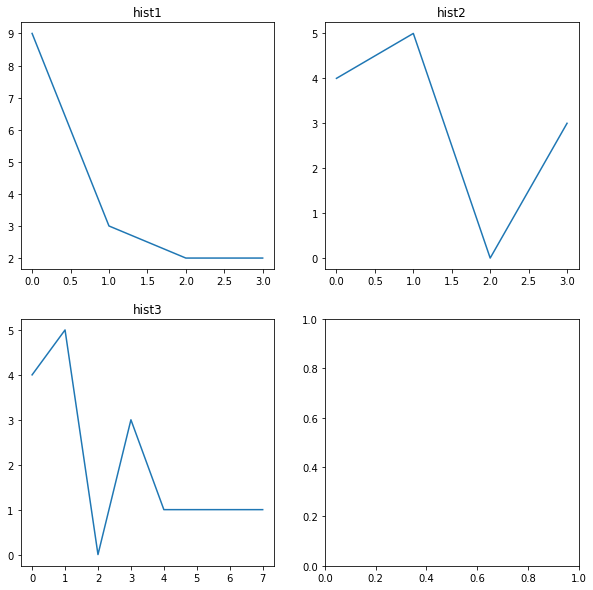

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 2, figsize =(10, 10))
fig.canvas.manager.set_window_title('plt')

src = np.array([[0, 0, 0, 0],
               [1, 1, 3, 5],
               [6, 1, 1, 3],
               [4, 3, 1, 7]
               ], dtype=np.uint8)

# 0, 1 = 9개 / 2, 3 = 3개 / 4, 5 = 2개 / 6, 7 = 2개
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize = [4], ranges = [0, 8])
print('hist1=', hist1)
ax[0][0].set_title('hist1')
ax[0][0].plot(hist1)

# 0 = 4개 / 1 = 5개 / 2 = 0개 / 3 = 3개
hist2 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize = [4], ranges = [0 ,4])
print('hist2=', hist2)
ax[0][1].set_title('hist2')
ax[0][1].plot(hist2)

# 0=4 / 1=5 / 2=0 / 3=3 / 4=1 / 5=1 / 6=1 / 7=1
hist3 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize = [8], ranges = [0 ,8])
ax[1][0].set_title('hist3')
ax[1][0].plot(hist3)

plt.show()

### 5.4 히스토그램 계산 2

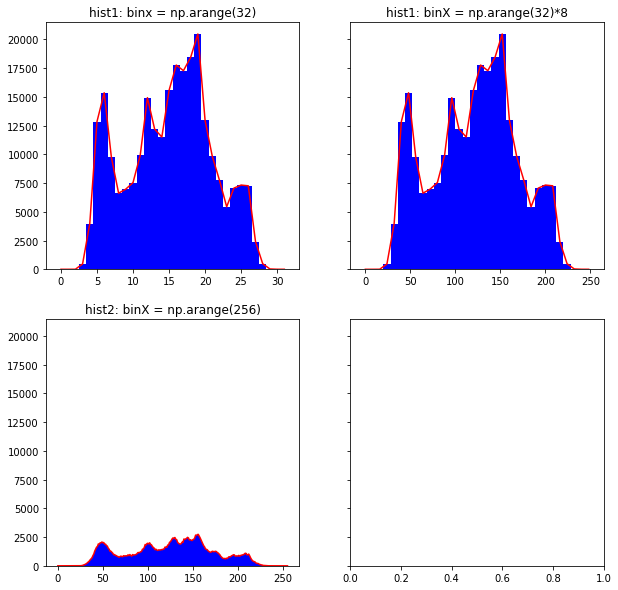

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('C:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

# 256개의 밝기 단계를 32(0~31)개로 나타냄
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[32], ranges=[0, 256])

# 256개의 밝기 단계를 256개(0~255)로 나타냄
hist2 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

hist1 = hist1.flatten()
hist2 = hist2.flatten()

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
fig.canvas.manager.set_window_title('plt')

ax[0][0].set_title('hist1: binx = np.arange(32)')
ax[0][0].plot(hist1, color = 'r') # 꺾은 선 그래프
binX = np.arange(32)
ax[0][0].bar(binX, hist1, width=1, color='b') # 막대 그래프

ax[0][1].set_title('hist1: binX = np.arange(32)*8')
binX = np.arange(32) * 8
ax[0][1].plot(binX, hist1, color='r')
ax[0][1].bar(binX, hist1, width=8, color='b')

ax[1][0].set_title('hist2: binX = np.arange(256)')
ax[1][0].plot(hist2, color='r')
binX = np.arange(256)
ax[1][0].bar(binX, hist2, width=1, color='b')

plt.show()

### 5.5 히스토그램 컬러

각 색상의 밝기 정보를 출력

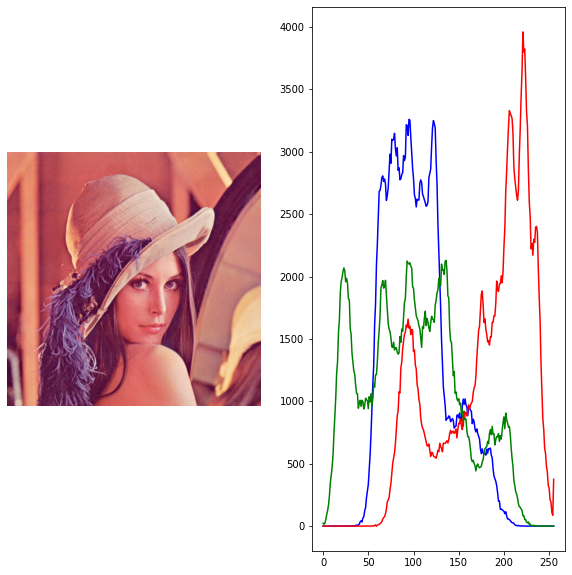

In [29]:
import cv2
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (10, 10))
fig.canvas.manager.set_window_title('plt')

src = cv2.imread('C:/data/lena.jpg')
ax[0].axis('off')
ax[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

histColor = ('b', 'g', 'r')
for i in range(3):
    hist = cv2.calcHist(images=[src], channels=[i], mask=None, histSize=[256], ranges=[0, 256])
    ax[1].plot(hist, color=histColor[i])
plt.show()

### 5.6 컬러 영상의 2채널 히스토그램

* 각 축이 만나는 지점의 개수 표현

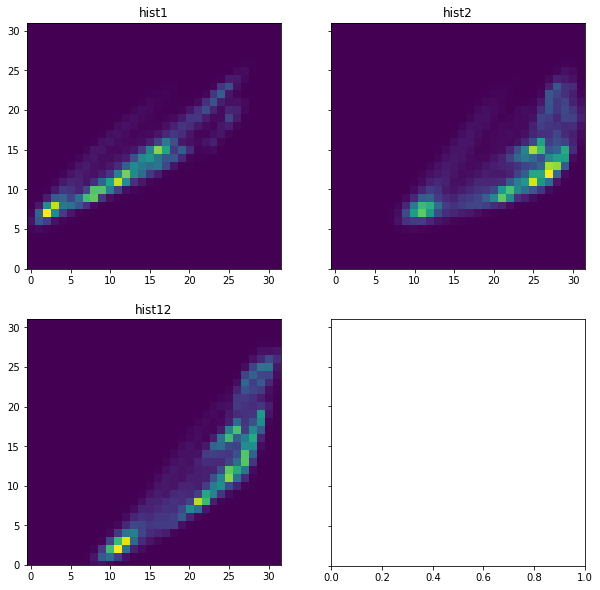

In [9]:
import cv2
from matplotlib import pyplot as plt

bgr = cv2.imread('c:/data/lena.jpg')

hist1 = cv2.calcHist([bgr], [0, 1], None, [32, 32], [0, 256, 0, 256])
hist2 = cv2.calcHist([bgr], [0, 2], None, [32, 32], [0, 256, 0, 256])
hist12 = cv2.calcHist([bgr], [1, 2], None, [32, 32], [0, 256, 0, 256])

fig, ax = plt.subplots(2, 2, figsize =(10, 10), sharey=True)
fig.canvas.manager.set_window_title('plt')

ax[0][0].set_title('hist1')
ax[0][0].set_ylim(0, 31)
ax[0][0].imshow(hist1, interpolation ="nearest")

ax[0][1].set_title('hist2')
ax[0][1].set_ylim(0, 31)
ax[0][1].imshow(hist2, interpolation ="nearest")

ax[1][0].set_title('hist12')
ax[1][0].set_ylim(0, 31)
ax[1][0].imshow(hist12, interpolation ="nearest")

plt.show()

### 5.7 히스토그램 역투영

* 역투영이란 관심 영역의 히스토그램과 유사한 히스토그램을 갖는 영역을 찾아내는 기법
* 얼굴 영역 분할을 위해 혹은 손 또는 얼굴등의 영역 분할

In [11]:
import cv2
import numpy as np 

src = np.array([[0, 0, 0, 0],
                [1, 1, 3, 5],
                [6, 1, 1, 3],
                [4, 3, 1, 7]], dtype=np.uint8)

hist = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 8])
print('hist= ', hist)

backP = cv2.calcBackProject([src], [0], hist, [0, 8], scale=1)
print('backP= ', backP)

hist=  [[9.]
 [3.]
 [2.]
 [2.]]
backP=  [[9 9 9 9]
 [9 9 3 2]
 [2 9 9 3]
 [2 3 9 2]]


### 5.8 Hue 채널의 히스토그램 역투영

In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/fruits.jpg')

# bgr to hsv 변환
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

# 관심영역 지정
roi = cv2.selectROI(src)
print('roi= ', roi)
roi_h = h[roi[1]:roi[1]+roi[3], roi[0]+roi[2]]

# 관심 영역의 히스토그램 계산
hist = cv2.calcHist([roi_h], [0], None, [64], [0, 256])

# 계산한 히스토그램을 통해 역투영
backP = cv2.calcBackProject([h.astype(np.float32)], [0],
                            hist, [0, 256], scale=1.0)

hist = cv2.sort(hist, cv2.SORT_EVERY_COLUMN+cv2.SORT_DESCENDING)
k = 1
T = hist[k][0]-1
print('T= ', T)
ret, dst = cv2.threshold(backP, T, 255, cv2.THRESH_BINARY)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

roi=  (292, 34, 174, 51)
T=  8.0


### 5.11 히스토그램 평활화 예

In [2]:
import cv2
import numpy as np

# 화소 범위가 [2, 4로] 저대비의 어두운 영상이다.
# src = np.array([[2, 2, 4, 4],
#                 [2, 2, 4, 4],
#                 [4, 4, 4, 4],
#                 [4, 4, 4, 4]]
#                , dtype =np.uint8)

# 교수님이 설명해주신 예제
# src = np.array([[0, 0, 1, 2],
#                 [0, 0, 1, 2],
#                 [2, 2, 2, 2],
#                 [2, 2, 2, 2]]
#                , dtype =np.uint8)

src = np.array([[0, 0, 1, 2],
                [0, 1, 2, 2],
                [1, 4, 5, 6],
                [2, 4, 6, 7]]
               , dtype =np.uint8)

# 저대비 영상을 고대비로 히스토그램 평활화
dst = cv2.equalizeHist(src)
print('dst =', dst)

# cv2.calcHist()를 직접 구현 한 알고리즘
hist, bins = np.histogram(src.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0) # cdf에서 0을 True 마스킹
T = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min()) # 히스토그램 평활화 알고리즘
T = np.ma.filled(T, 0).astype('uint8') # 마스킹을 0으로
dst2 = T[src]



dst = [[  0   0  59 137]
 [  0  59 137 137]
 [ 59 177 196 235]
 [137 177 235 255]]


### 5.12 그레이스케일 영상의 히스토그램 평활화

* 파란색은 원본의 누적분포
* 빨간색은 평활화후 누적분포

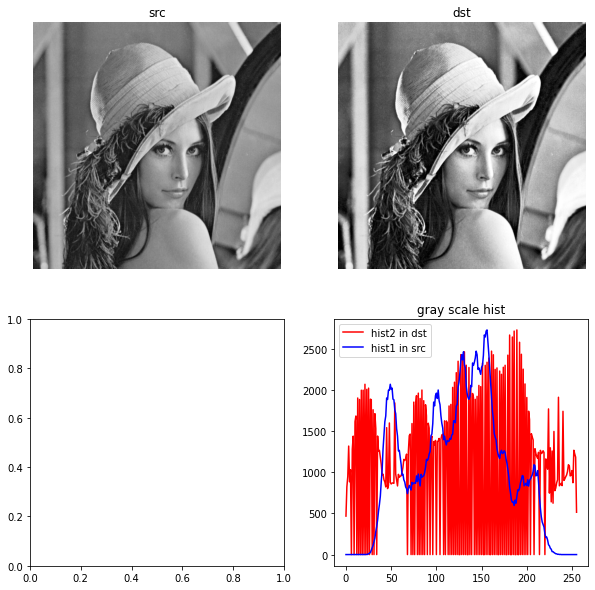

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('C:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.equalizeHist(src) # 평활화
# cv2.imshow('src no hist', src)
# cv2.imshow('dst hist', dst)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.canvas.manager.set_window_title('plt')

ax[0][0].axis('off')
ax[0][0].set_title('src')
ax[0][0].imshow(src, cmap='gray')

ax[0][1].axis('off')
ax[0][1].set_title('dst')
ax[0][1].imshow(dst, cmap='gray')

plt.title('gray scale hist')
hist2 = cv2.calcHist(images=[dst], channels=[0], mask=None,
                     histSize=[256], ranges=[0, 256])
plt.plot(hist2, color='r', label='hist2 in dst')

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                     histSize=[256], ranges=[0, 256])
plt.plot(hist1, color='b', label='hist1 in src')

plt.legend(loc='best')
plt.show()

# cv2.waitKey()
# cv2.destroyAllWindows()

### 5.13 컬러 영상 히스토그램 평활화

* 컬러를 평활화 할 때에는 RGB를 HSV 혹은 yCrCb 등으로 변환 후 실행 해줘야 한다.

In [4]:
import cv2
import numpy as np

src = cv2.imread('C:/data/lena.jpg')
src = cv2.resize(src, (400, 400))

cv2.imshow('src', src)

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
v2 = cv2.equalizeHist(v) # hsv의 밝기 정보 평탄화
hsv2 = cv2.merge([h, s, v2]) # 합성
dst = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
cv2.imshow('hsv dst', dst)

ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(ycrcb)
y2 = cv2.equalizeHist(y)
ycrcb2 = cv2.merge([y2, cr, cb])
dst2 = cv2.cvtColor(ycrcb2, cv2.COLOR_YCR_CB2BGR)
cv2.imshow('ycrcb dst', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

### 실습 예제1, 웹캠의 화면을 평탄화 시켜서 출력

* hsv, yCrCb

In [13]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    frame = cv2.resize(frame, (480, 270))
    
    # 원본 출력
    cv2.imshow('src', frame)
    
    # hsv을 이용한 평활화
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v2 = cv2.equalizeHist(v)
    hsv2 = cv2.merge([h, s, v2])
    dst1 = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
    cv2.imshow('hsv', dst1)
    
    # ycrcb를 이용한 평활화
    ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    y2 = cv2.equalizeHist(y)
    ycrcb2 = cv2.merge([y2, cr, cb])
    dst2 = cv2.cvtColor(ycrcb2, cv2.COLOR_YCrCb2BGR)
    cv2.imshow('yCrCb', dst2)
    
    key = cv2.waitKey(25)
    
    # esc 누르면 종료
    if key == 27:
        break

# 웹캠 종료
if cap.isOpened():
    cap.release()

# 모든 윈도우 종료
cv2.destroyAllWindows()

### 복습, 이미지 평탄화 후 저장

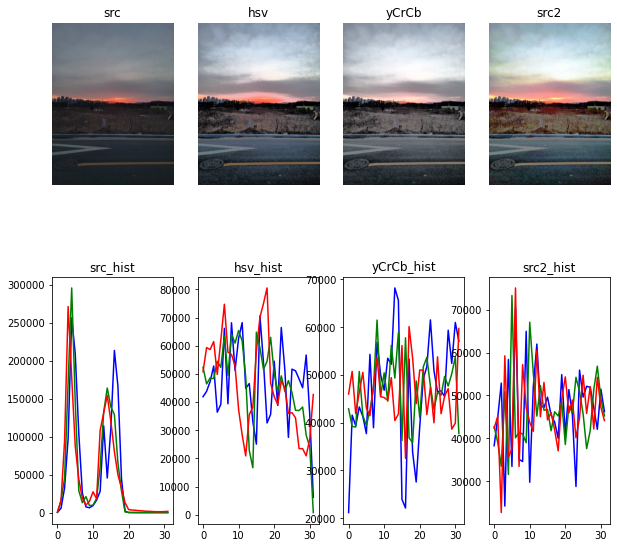

In [8]:
import cv2
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 4, figsize =(10, 10))
fig.canvas.manager.set_window_title('plt')

src = cv2.imread('c:/data/black1.jpg')
cv2.imwrite('./src.png', src)

ax[0][0].axis('off')
ax[0][0].set_title('src')
ax[0][0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
v2 = cv2.equalizeHist(v)
hsv2 = cv2.merge([h, s, v2])
dst1 = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)

cv2.imwrite('./hsv.png', dst1)
ax[0][1].axis('off')
ax[0][1].set_title('hsv')
ax[0][1].imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB))

ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(ycrcb)
y2 = cv2.equalizeHist(y)
ycrcb2 = cv2.merge([y2, cr, cb])
dst2 = cv2.cvtColor(ycrcb2, cv2.COLOR_YCrCb2BGR)

cv2.imwrite('./ycrcb.png', dst2)
ax[0][2].axis('off')
ax[0][2].set_title('yCrCb')
ax[0][2].imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))

b, g, r = cv2.split(src)
b2 = cv2.equalizeHist(b)
g2 = cv2.equalizeHist(g)
r2 = cv2.equalizeHist(r)
src2 = cv2.merge([b2, g2, r2])

cv2.imwrite('./src2.png', src2)
ax[0][3].axis('off')
ax[0][3].set_title('src2')
ax[0][3].imshow(cv2.cvtColor(src2, cv2.COLOR_BGR2RGB))

histColor = ['b', 'g', 'r']

# 히스토그램 
for i in range(3):
    hist1 = cv2.calcHist(images=[src], channels=[i], mask=None, histSize=[32], ranges=[0, 256])
    ax[1][0].plot(hist1, color=histColor[i])
ax[1][0].set_title('src_hist')

for i in range(3):
    hist2 = cv2.calcHist(images=[dst1], channels=[i], mask=None, histSize=[32], ranges=[0, 256])
    ax[1][1].plot(hist2, color=histColor[i])
ax[1][1].set_title('hsv_hist')

for i in range(3):
    hist3 = cv2.calcHist(images=[dst2], channels=[i], mask=None, histSize=[32], ranges=[0, 256])
    ax[1][2].plot(hist3, color=histColor[i])
ax[1][2].set_title('yCrCb_hist')

for i in range(3):
    hist4 = cv2.calcHist(images=[src2], channels=[i], mask=None, histSize=[32], ranges=[0, 256])
    ax[1][3].plot(hist4, color=histColor[i])
ax[1][3].set_title('src2_hist')

plt.show()

### threshold, equalhist

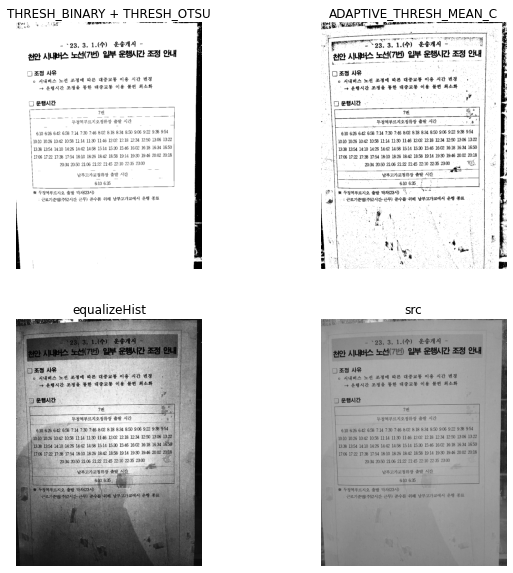

In [10]:
import cv2
from matplotlib import pyplot as plt
src = cv2.imread('c:/data/text1.jpg', cv2.IMREAD_GRAYSCALE)
# src = cv2.imread('c:/data/srcThreshold.png', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(2, 2, figsize = (10, 10), sharey=True)
fig.canvas.manager.set_window_title('plt')

# cv2.THRESH_OTSU로 인해 임계값을 바꿔도 많이 차이가 나지 않음
ret, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ax[0][0].axis('off')
ax[0][0].set_title('THRESH_BINARY + THRESH_OTSU')
ax[0][0].imshow(dst, cmap='gray')

# cv2.adaptiveThreshold(입력 이미지, 최댓값, 적응형 이진화 플래그, 임곗값 형식, 블록 크기, 감산값)
# cv2.ADAPTIVE_THRESH_MEAN_C, blockSize 영역의 모든 픽셀에 평균 가중치를 적용
dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 7)
ax[0][1].axis('off')
ax[0][1].set_title('ADAPTIVE_THRESH_MEAN_C')
ax[0][1].imshow(dst2, cmap='gray')

# cv2.ADAPTIVE_THRESH_GAUSSIAN_C, blockSize 영역의 모든 픽셀에 중심점으로부터의 거리에 대한 가우시안 가중치 적용
dst3 = cv2.equalizeHist(src)
ax[1][0].axis('off')
ax[1][0].set_title('equalizeHist')
ax[1][0].imshow(dst3, cmap='gray')

ax[1][1].axis('off')
ax[1][1].set_title('src')
ax[1][1].imshow(src, cmap='gray')

plt.show()

src = cv2.resize(src, (600, 800))
dst2 = cv2.resize(dst2, (600, 800))
# cv2.imshow('dst1', src)
# cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()